# MMEditing Inference Tutorial

Welcome to MMEditing! This is the official tutorial for using MMEditing inference api to predict your own image or video.

In this tutorial, you will learn how to

- Install MMEditing

- Perform inference using MMEdit inference API

- Perform inference with models of different tasks including:

&emsp; &emsp; 1. Inference of conditional GANs models

&emsp; &emsp; 2. Inference of inpanting models

&emsp; &emsp; 3. Inference of matting models

&emsp; &emsp; 4. Inference of super resolution models

&emsp; &emsp; 5. Inference of image2image translation models

&emsp; &emsp; 6. Inference of unconditional GANs models

&emsp; &emsp; 7. Inference of video interpolation models

&emsp; &emsp; 8. Inference of video super resolution models

Let's start!

## 1. Install MMEditing

In [1]:
# Check PyTorch version
!pip3 list | grep torch

ema-pytorch             0.0.10
open-clip-torch         2.5.0
torch                   1.9.0+cu111
torchvision             0.10.0+cu111


In [5]:
# Install mmcv dependency via openmim
!pip3 install openmim
!mim install 'mmcv>=2.0.0rc1'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html


In [3]:
# Install mmediting from source
!git clone -b 1.x https://github.com/open-mmlab/mmediting.git
%cd mmediting
!pip3 install -e .

Cloning into 'mmediting'...
remote: Enumerating objects: 18482, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 18482 (delta 15), reused 3 (delta 0), pack-reused 18439
Receiving objects: 100% (18482/18482), 10.21 MiB | 36.00 KiB/s, done.
Resolving deltas: 100% (12504/12504), done.
Checking out files: 100% (1280/1280), done.
/mnt/petrelfs/liuwenran/develop/mmediting/demo/mmediting
Obtaining file:///mnt/petrelfs/liuwenran/develop/mmediting/demo/mmediting
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmedit


In [8]:
# Check MMEditing installation
import mmedit
print(mmedit.__version__)

1.0.0rc3


## 2. Perform inference with MMEditing API

Next we describe how to perform inference with python code snippets.

(We also provide command line interface for you to do inference by running mmediting_inference_demo.py. The usage of this interface could be found in [README.md](demo/readme.md) and more guidance could be found on the [web page](https://mmediting.readthedocs.io/en/dev-1.x/user_guides/3_inference.html#).)


### 2.1 Prepare some images or videos for inference

Before we start to perform inference with a pretrained model, some input images or videos should be prepared. 

Take image translation for example. We need a input image to be translated.

Put your image to some directory and make a directory to save processed image.

In [3]:
# make a dir for input image and output image
!mkdir -p ./../resources/input/translation
!mkdir -p ./../resources/output/translation

We also have prepared some images and videos for you, which could be downloaded from here(url).

Download and extract it to MMEdit root path.

In [ ]:
# download resources
!cd mmedting
!wget url
!unzip resources.zip

### 2.2 Perform inference with two lines of python code. 

There are two steps:

First, create a MMEdit instance by a pretrained model name.

Second, infer your own image with this MMEdit instance. The translated image will be saved to result_out_dir.

In [5]:
from mmedit.edit import MMEdit

# Create a MMEdit instance
editor = MMEdit('pix2pix')
# Infer a image. Input image path and output image path is needed.
results = editor.infer(img='../resources/input/translation/gt_mask_0.png', result_out_dir='../resources/output/translation/tutorial_translation_pix2pix_res.jpg')

http loads checkpoint from path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


You could see your result image by plotting it out.

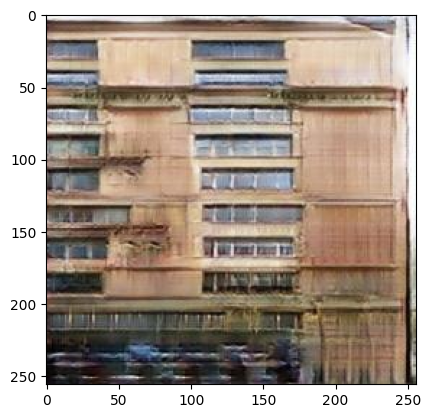

In [1]:
# plot the result image
import mmcv
import matplotlib.pyplot as plt 
img = mmcv.imread('../resources/output/translation/tutorial_translation_pix2pix_res.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 2.3 Infer with different settings of a specific model

There are some different configs and checkpoints for one model.

Take conditional GAN model 'biggan' as an example. We have pretrained model for Cifar and Imagenet, and all pretrained models of 'biggan' are listed in its [metafile.yaml](../configs/biggan/metafile.yml)

You could configure different settings by passing 'model_setting' to 'MMEdit'. Every model's default setting is 0.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/biggan/biggan_imagenet1k_128x128_b32x8_best_fid_iter_1232000_20211111_122548-5315b13d.pth


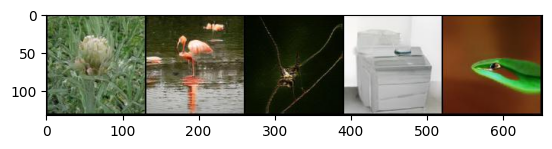

In [7]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

result_out_dir = '../resources/output/conditional/tutorial_conditinal_biggan_res_setting1.jpg'
# configure setting to 1
editor = MMEdit('biggan', model_setting=1) 
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 2.3 Inference with extra parameters

Some models may have extra parameters that could be configured to perform inference.

Take 'biggan' for example. You could configure 'num_batches' in a dict and pass it to 'MMEdit'.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/biggan/biggan_imagenet1k_128x128_b32x8_best_fid_iter_1232000_20211111_122548-5315b13d.pth


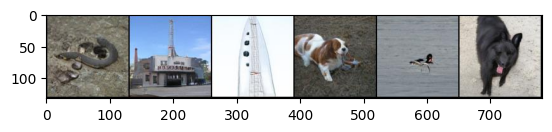

In [8]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

result_out_dir = '../resources/output/conditional/tutorial_conditinal_biggan_res_sample6.jpg'
# use a dict to pass the parameters, num_batches means images output num for one inference
editor = MMEdit('biggan', model_setting=1, extra_parameters={'num_batches':6}) 
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image and we could see 6 images in a inference batch
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

To know what extra parameters that a model have, do like this.

In [5]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

editor = MMEdit('biggan', model_setting=1) 
editor.print_extra_parameters()
# 'num_batches' and 'sample_model' are extra parameters in 'biggan' model.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/biggan/biggan_imagenet1k_128x128_b32x8_best_fid_iter_1232000_20211111_122548-5315b13d.pth
['num_batches', 'sample_model']


## 3. Perform inference with models of different tasks

There are multiple task types in MMEditing: Matting, Inpainting, Video Super-Resolution, Image Super-Resolution, Image2Image Translation, Unconditional GANs, Conditional GANs, Video Interpolation. 

We provide some models for each task. All available models and tasks could be printed out like this.

In [2]:
from mmedit.edit import MMEdit

# print all available models for inference.
inference_supported_models = MMEdit.get_inference_supported_models()
print('all available models:')
print(inference_supported_models)

# print all available tasks for inference.
supported_tasks = MMEdit.get_inference_supported_tasks()
print('all available models:')
print(supported_tasks)

# print all available models for one task, take image translation for example.
task_supported_models = MMEdit.get_task_supported_models('Image2Image Translation')
print('translation models:')
print(task_supported_models)

all available models:
['biggan', 'styleganv1', 'gca', 'aot_gan', 'pix2pix', 'esrgan', 'basicvsr', 'flavr']
all available models:
['Matting', 'Inpainting', 'Video Super-Resolution', 'Image Super-Resolution', 'Image2Image Translation', 'Unconditional GANs', 'Conditional GANs', 'Video Interpolation']
translation models:
['pix2pix']


### 3.1 Inference of conditional GAN models

Conditional GAN models take a label as input and output a image. We take 'biggan' as an example.

/mnt/petrelfs/liuwenran/miniconda3/envs/py38pt19cu111/lib/python3.8/site-packages/mmcv/cnn/bricks/conv_module.py:153: UserWarning: Unnecessary conv bias before batch/instance norm
  warnings.warn(


http loads checkpoint from path: https://download.openmmlab.com/mmgen/biggan/biggan_imagenet1k_128x128_b32x8_best_fid_iter_1232000_20211111_122548-5315b13d.pth


/mnt/petrelfs/liuwenran/miniconda3/envs/py38pt19cu111/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


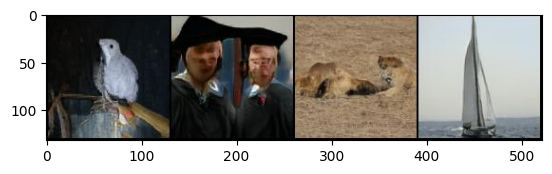

In [8]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
result_out_dir = '../resources/output/conditional/tutorial_conditinal_biggan_res.jpg'
editor = MMEdit('biggan', model_setting=1)
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.2 Inference of inpainting models

Inpaiting models take a masked image and mask pair as input, and output a inpainted image. We take 'aot_gan' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth


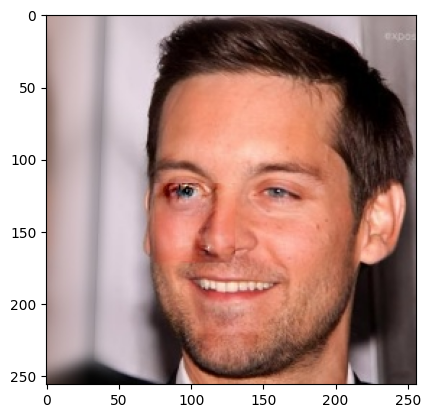

In [4]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/inpainting/celeba_test.png'
mask = '../resources/input/inpainting/bbox_mask.png'
result_out_dir = '../resources/output/inpainting/tutorial_inpainting_global_local_res.jpg'
editor = MMEdit('global_local', model_setting=1)
results = editor.infer(img=img, mask=mask, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.3 Inference of matting models

Inpaiting models take a image and trimap pair as input, and output a alpha image. We take 'gca' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmediting/mattors/gca/baseline_r34_4x10_200k_comp1k_SAD-34.61_20220620-96f85d56.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



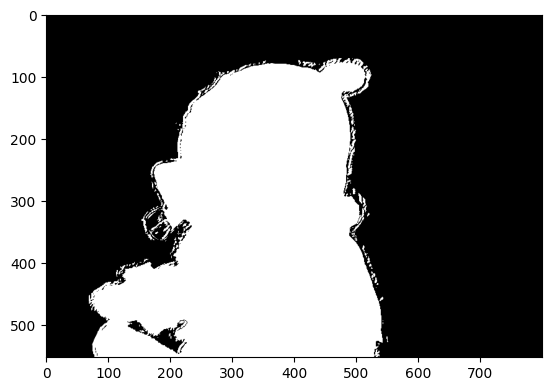

In [7]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/matting/GT05.jpg'
trimap = '../resources/input/matting/GT05_trimap.jpg'
result_out_dir = '../resources/output/matting/tutorial_matting_gca_res.png'
editor = MMEdit('gca')
results = editor.infer(img=img, trimap=trimap, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.4 Inference of image super resolution models

Image super resolution models take a image as input, and output a high resolution image. We take 'esrgan' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_psnr_x4c64b23g32_1x16_1000k_div2k_20200420-bf5c993c.pth


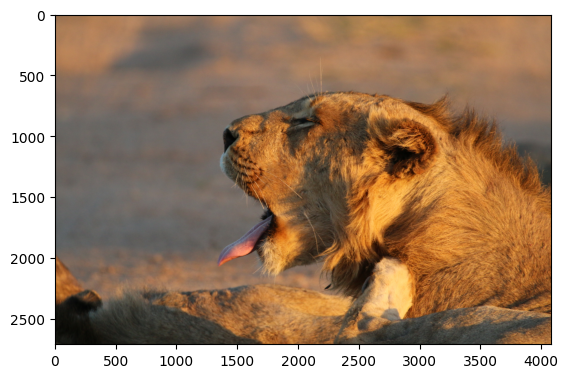

In [8]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/restoration/0901x2.png'
result_out_dir = '../resources/output/restoration/tutorial_restoration_esrgan_res.png'
editor = MMEdit('esrgan')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.5 Inference of image translation models

Image translation models take a image as input, and output a translated image. We take 'pix2pix' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


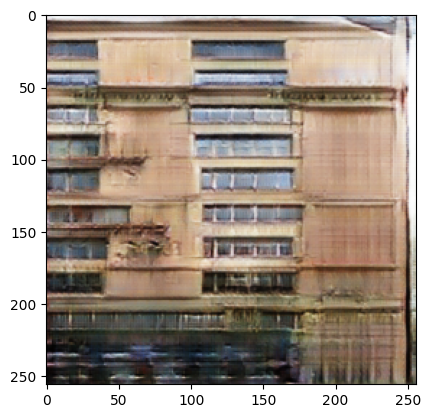

In [22]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/translation/gt_mask_0.png'
result_out_dir = '../resources/output/translation/tutorial_translation_pix2pix_res.png'
editor = MMEdit('pix2pix')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.6 Inference of unconditional GAN models

Unconditional GAN models do not need input, and output a image. We take 'styleganv1' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/styleganv1/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth
Switch to evaluation style mode: single
Switch to evaluation style mode: single


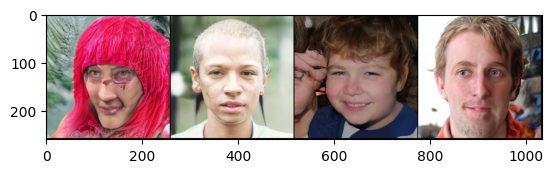

In [9]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
result_out_dir = '../resources/output/unconditional/tutorial_unconditional_styleganv1_res.png'
editor = MMEdit('styleganv1')
results = editor.infer(result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.7 Inference of video interpolation models

Video interpolation models take a video as input, and output a interpolated video. We take 'flavr' as an example.

In [3]:
import mmcv
import matplotlib.pyplot as plt 
import os
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
video = '../resources/input/video_interpolation/b-3LLDhc4EU_000000_000010.mp4'
result_out_dir = '../resources/output/video_interpolation/tutorial_video_interpolation_flavr_res.mp4'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMEdit('flavr')
results = editor.infer(video=video, result_out_dir=result_out_dir)

http loads checkpoint from path: https://download.openmmlab.com/mmediting/video_interpolators/flavr/flavr_in4out1_g8b4_vimeo90k_septuplet_20220509-c2468995.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 22/22, 0.1 task/s, elapsed: 245s, ETA:     0s11/21 00:31:46 - mmengine - INFO - Output video is save at ../resources/output/video_interpolation/tutorial_video_interpolation_flavr_res.mp4.
11/21 00:31:46 - mmengine - INFO - Visualization is implemented in forward process.
11/21 00:31:46 - mmengine - INFO - Postprocess is implemented in forward process.


Please check the result video in the output directory.

### 3.8 Inference of video restoration models

Video restoration models take a video as input, and output a restorated video. We take 'basicvsr' as an example..

In [2]:
import mmcv
import matplotlib.pyplot as plt 
import os
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
video = '../resources/input/video_restoration/QUuC4vJs_000084_000094_400x320.mp4'
result_out_dir = '../resources/output/video_restoration/tutorial_video_restoration_edvr_res.mp4'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMEdit('edvr', extra_parameters={'window_size':5})
results = editor.infer(video=video, result_out_dir=result_out_dir)

http loads checkpoint from path: https://download.openmmlab.com/mmediting/restorers/edvr/edvrm_wotsa_x4_8x4_600k_reds_20200522-0570e567.pth
11/20 18:13:55 - mmengine - INFO - Output video is save at ../resources/output/video_restoration/tutorial_video_restoration_edvr_res.mp4.
11/20 18:13:55 - mmengine - INFO - Postprocess is implemented in visualize process.


Please check the result video in the output directory.